In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

In [2]:
## Load in the randomly generated data
tappy_df=pd.read_csv('Imputed_data_Ivan.csv')

In [3]:
length=len(list(tappy_df.columns))
length

52

In [4]:
X = tappy_df.iloc[:,0:length-1]
y = tappy_df.iloc[:,length-1]

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
X_scaler = scaler.fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X_scaler,y,
                                                test_size=.2,
                                                shuffle=True,
                                                random_state=614,
                                                stratify=y)

In [10]:
def get_acc(model,X,y):
    pred = model.predict(X)
    return np.sum(pred == y)/len(y)

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
log_reg = LogisticRegression(max_iter=10000)

log_reg.fit(X_train,y_train)


LogisticRegression(max_iter=10000)

In [13]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

y_train_pred = log_reg.predict(X_train)

accu=get_acc(log_reg,X_train,y_train.ravel())

print(accu)
print("Our model has a ",
      np.round(sum(y_train_pred == y_train.ravel())/len(y_train.ravel())*100,2),
      "% accuracy on the test set")
print(precision_score(y_train, y_train_pred))
print(recall_score(y_train, y_train_pred))

confusion_matrix(y_train, y_train_pred)

0.7794117647058824
Our model has a  77.94 % accuracy on the test set
0.75
0.6


array([[38,  5],
       [10, 15]], dtype=int64)

In [14]:
log_reg.predict_proba(X_train)[:,1]

array([0.29052396, 0.21296167, 0.08867679, 0.33871171, 0.21736443,
       0.18643574, 0.41498519, 0.29187123, 0.0571944 , 0.01275174,
       0.4899213 , 0.05643013, 0.68098395, 0.17238715, 0.12779681,
       0.11892609, 0.39444812, 0.83655495, 0.54652832, 0.60638951,
       0.79563188, 0.88225797, 0.52783436, 0.32080361, 0.85731643,
       0.77033786, 0.02339107, 0.51900548, 0.39817178, 0.05220051,
       0.43567414, 0.48945754, 0.4146989 , 0.49841524, 0.71056294,
       0.88676702, 0.09945104, 0.27525865, 0.76328779, 0.54344942,
       0.1039347 , 0.51340966, 0.36264998, 0.00383252, 0.05995343,
       0.39886491, 0.1470319 , 0.81259898, 0.68361014, 0.26328707,
       0.10766671, 0.576156  , 0.24938422, 0.39858642, 0.71142569,
       0.08447953, 0.17344393, 0.30555122, 0.90315969, 0.47424837,
       0.18354462, 0.01117712, 0.40894157, 0.01852409, 0.15633686,
       0.02571427, 0.00766688, 0.44883177])

In [15]:
## Write code to calculate the accuracy for any cutoff, then choose your cutoff
cutoff = 0.5

## store the predicted probabilities
y_prob = log_reg.predict_proba(X_train)[:,1]

## assign the value based on the cutoff
y_train_pred = 1*(y_prob > cutoff)

## print the accuracy
## input the accuracy after "is",
print("The training accuracy for a cutoff of",cutoff,
      "is", np.sum(y_train_pred == y_train)/len(y_train))

The training accuracy for a cutoff of 0.5 is 0.7794117647058824


In [16]:
y_prob = log_reg.predict_proba(X_test)[:,1]
cutoffs = np.arange(0,1.01,.01)
accs = []

for cutoff in cutoffs:
    y_test_pred = 1*(y_prob > cutoff)
    accs.append(np.sum(y_test_pred == y_test)/len(y_test))

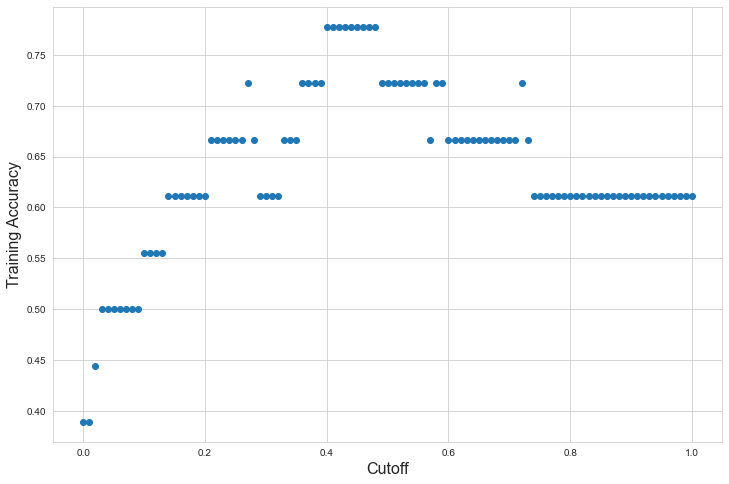

In [17]:
%matplotlib inline
plt.figure(figsize=(12,8))
sns.set_style("whitegrid")

plt.scatter(cutoffs,accs)

plt.xlabel("Cutoff",fontsize=16)
plt.ylabel("Training Accuracy",fontsize=16)

plt.savefig('AccuracyPerCutoff.pdf', dpi=300, bbox_inches='tight')

plt.show()

In [18]:
print("A .1 unit increase in our feature multiplies" + 
      " the odds of being classified as 1 by " + 
      str(np.round(np.exp(.1*log_reg.coef_[0][0]),2)))

A .1 unit increase in our feature multiplies the odds of being classified as 1 by 1.04
